In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import geopandas as gpd

In [3]:
df = pd.read_csv("DataAnalyst.csv")

# Data Preparation and Cleaning

In [4]:
df.head()

,Unnamed: 0,JobTitle,SalaryEstimate,JobDescription,Rating,CompanyName,Location,Headquarters,Size,Founded,TypeOfOwnership,Industry,Sector,Revenue,Competitors,EasyApply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE


In [5]:
df.shape

(2253, 16)

## Missing Values

In [8]:
df.isnull().sum()

Unnamed: 0         0
JobTitle           0
SalaryEstimate     0
JobDescription     0
Rating             0
CompanyName        1
Location           0
Headquarters       0
Size               0
Founded            0
TypeOfOwnership    0
Industry           0
Sector             0
Revenue            0
Competitors        0
EasyApply          0
dtype: int64

### Null Values are represented as -1 or '-1'

In [9]:
#Turn into a dataframe for cleaner output
cols_with_null = []
for col in df.columns[1:]:
    print('Feature: {}'.format(col))
    null_count = ((df[col] == -1) | (df[col] == '-1')).sum()
    if null_count > 0:
        cols_with_null.append(col)
    print('Null Count: {}'.format(null_count))
    print('Percentage of Null Values: {}'.format(null_count / len(df)))
    print('\n')

Feature: JobTitle
Null Count: 0
Percentage of Null Values: 0.0


Feature: SalaryEstimate
Null Count: 1
Percentage of Null Values: 0.0004438526409232135


Feature: JobDescription
Null Count: 0
Percentage of Null Values: 0.0


Feature: Rating
Null Count: 272
Percentage of Null Values: 0.12072791833111407


Feature: CompanyName
Null Count: 0
Percentage of Null Values: 0.0


Feature: Location
Null Count: 0
Percentage of Null Values: 0.0


Feature: Headquarters
Null Count: 172
Percentage of Null Values: 0.07634265423879272


Feature: Size
Null Count: 163
Percentage of Null Values: 0.0723479804704838


Feature: Founded
Null Count: 660
Percentage of Null Values: 0.2929427430093209


Feature: TypeOfOwnership
Null Count: 163
Percentage of Null Values: 0.0723479804704838


Feature: Industry
Null Count: 353
Percentage of Null Values: 0.15667998224589436


Feature: Sector
Null Count: 353
Percentage of Null Values: 0.15667998224589436


Feature: Revenue
Null Count: 163
Percentage of Null Values: 0.

In [10]:
cols_with_null

['SalaryEstimate',
 'Rating',
 'Headquarters',
 'Size',
 'Founded',
 'TypeOfOwnership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors',
 'EasyApply']

In [11]:
for feature in cols_with_null:
    df.loc[(df[feature] == -1) | (df[feature] == '-1'), feature] = np.nan

In [12]:
df.head()

,Unnamed: 0,JobTitle,SalaryEstimate,JobDescription,Rating,CompanyName,Location,Headquarters,Size,Founded,TypeOfOwnership,Industry,Sector,Revenue,Competitors,EasyApply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,TRUE
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE


In [13]:
df.isnull().sum()

Unnamed: 0            0
JobTitle              0
SalaryEstimate        1
JobDescription        0
Rating              272
CompanyName           1
Location              0
Headquarters        172
Size                163
Founded             660
TypeOfOwnership     163
Industry            353
Sector              353
Revenue             163
Competitors        1732
EasyApply          2173
dtype: int64

## Checking for Duplicate Rows

In [14]:
df[df.duplicated()]

,Unnamed: 0,JobTitle,SalaryEstimate,JobDescription,Rating,CompanyName,Location,Headquarters,Size,Founded,TypeOfOwnership,Industry,Sector,Revenue,Competitors,EasyApply


## Cleaning up Formatting Across Columns

### Job Title

In [15]:
len(df['JobTitle'].unique())

1272

In [16]:
df['JobTitle'].value_counts()[:30]

Data Analyst                               405
Senior Data Analyst                         90
Junior Data Analyst                         30
Business Data Analyst                       28
Sr. Data Analyst                            21
Data Analyst Junior                         17
Data Quality Analyst                        17
Data Analyst II                             17
Data Governance Analyst                     16
Lead Data Analyst                           15
Data Reporting Analyst                      13
Financial Data Analyst                      12
Data Analyst III                            11
Data Analyst I                              11
Sr Data Analyst                              9
Marketing Data Analyst                       9
Data Management Analyst                      8
Data Warehouse Analyst                       8
SQL Data Analyst                             7
Technical Data Analyst                       7
Data Science Analyst                         7
Clinical Data

In [17]:
df['JobTitle'].replace(['Sr. Data Analyst', 'Sr Data Analyst', 
                        'Data Analyst III'], 'Senior Data Analyst', inplace=True)
df['JobTitle'].replace(['Data Analyst Junior', "Data Analyst II"], 
                       'Junior Data Analyst', inplace=True)
df['JobTitle'].value_counts()[:20]

Data Analyst               405
Senior Data Analyst        131
Junior Data Analyst         64
Business Data Analyst       28
Data Quality Analyst        17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst I              11
Marketing Data Analyst       9
Data Management Analyst      8
Data Warehouse Analyst       8
SQL Data Analyst             7
Data Science Analyst         7
Technical Data Analyst       7
Research Data Analyst        6
Data Security Analyst        6
Healthcare Data Analyst      6
Clinical Data Analyst        6
Name: JobTitle, dtype: int64

### Salary Estimate

In [18]:
df['SalaryEstimate'].dtype

dtype('O')

In [19]:
df['SalaryEstimate'].value_counts()

$41K-$78K (Glassdoor est.)    57
$42K-$76K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$58K-$93K (Glassdoor est.)    31
                              ..
$42K-$63K (Glassdoor est.)     4
$43K-$77K (Glassdoor est.)     3
$47K-$81K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
Name: SalaryEstimate, Length: 89, dtype: int64

Lets extract the numbers and discard the rest of the information

In [20]:
df['LowerEndSalary'] = df['SalaryEstimate'].str[1:3]
df['UpperEndSalary'] = df['SalaryEstimate'].str[6:8]

In [21]:
df['LowerEndSalary'].unique()

array(['37', '46', '51', '59', '43', '60', '41', '45', '73', '84', '27',
       '42', '77', '98', '48', '26', '31', '47', '49', '30', '55', '57',
       '35', '65', '11', '67', '97', '68', '29', '74', '53', '38', '64',
       '50', '76', '34', '24', '44', '89', '69', '58', '63', '40', '28',
       '54', '99', '93', '82', nan, '32', '36', '78'], dtype=object)

In [22]:
df['UpperEndSalary'].unique()

array(['66', '87', '88', '85', '76', '11', '78', '12', '90', '52', '74',
       '13', '96', '47', '59', '81', '69', '54', '10', '70', '45', '$1',
       '63', '82', '92', '38', '94', '68', '44', '93', '89', '61', '48',
       '53', '86', '15', '42', '77', '72', '67', '75', '99', '17', nan,
       '56', '91'], dtype=object)

There is one instance in which this method of string parsing was not effective in extracting exclusively the number value, so let's try a method less sensitive to differences in formatting (regex matching). Furthermore, this indexing method does not account for 6 figure salaries.

In [23]:
import re
def salary_extract(salary_string):
    return re.findall(r'(\d+)', str(salary_string))

In [24]:
df['salaries_parsed'] = df['SalaryEstimate'].apply(salary_extract)

In [25]:
df['LowerEndSalary'] = [int(salary[0]) if len(salary) == 2 else np.nan for salary 
                        in df['salaries_parsed']] 
df['UpperEndSalary'] = [int(salary[1]) if len(salary) == 2 else np.nan for salary 
                        in df['salaries_parsed']]
df = df.loc[df['LowerEndSalary'].notna()]

In [26]:
df['AvgSalary'] = (df['LowerEndSalary'] + df['UpperEndSalary']) // 2
df[['LowerEndSalary', 'UpperEndSalary', 'AvgSalary']]

,LowerEndSalary,UpperEndSalary,AvgSalary
0,37.0,66.0,51.0
1,37.0,66.0,51.0
2,37.0,66.0,51.0
3,37.0,66.0,51.0
4,37.0,66.0,51.0
...,...,...,...
2248,78.0,104.0,91.0
2249,78.0,104.0,91.0
2250,78.0,104.0,91.0
2251,78.0,104.0,91.0


### Job Description

In [28]:
df['JobDescription'].describe()

count                                                  2252
unique                                                 2252
top       Req ID: 35181\nExperience Level: Professional\...
freq                                                      1
Name: JobDescription, dtype: object

In [29]:
print(df['JobDescription'][0])

Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sifting through complex datasets to illuminate trends and insights? Do you see yourself working for a values-driven organization with a vision to tackle the most pressing injustices of our day?

We are looking to hire a bright, hard-working, and creative individual with strong data management skills and a demonstrated commitment to immigrant's rights. The Data Analyst will assist with analysis and reporting needs for Veras Center on Immigration and Justice (CIJ), working across its current projects and future Vera initiatives.

Who we are:

Founded in 1961, The Vera Institute is an independent, non-partisan, nonprofit organization that combines expertise in research, technical assistance, and demonstration projects to assist leaders in government and civil society examine justice policy and practice, and improve the systems people rely on for justice and safety.
We study problems that impede hum

In [30]:
test_str = df['JobDescription'][3]
test_str = re.sub(r'[^\w\s]', '', test_str)
test_str = test_str.lower()
test_str

'requisition numberrr0001939\nremoteyes\nwe collaborate we create we innovate\n\nintrigued\n\nyoure a business professional with an innate curiosity that thrives in a dynamic and agile environment you appreciate teamwork exemplify integrity perseverance flexibility and a generosity of spirit if this sounds like you then please apply  wed love to meet you\n\ncelerity is expanding and on the hunt for the savvy creative and analytically sound individuals that are motivated by solving complex problems were in the business of transforming how people process and systems coexist while improving operational efficiencies and userdriven interactions we work with groundbreaking companies melding expertise in digital strategy technology creative and business transformation\nthe health and safety of our employees is our top priority due to the pandemic all our employees are working remotely and we will be conducting candidate interviews by video this position will continue to be remote once the cov

In [31]:
def freq(job_str):
    #Removing Punctuation
    job_str = re.sub(r'[^\w\s]', '', job_str)
    
    #Making lowercase
    job_str = job_str.lower()
    
    #Splitting on spaces
    job_str = job_str.split()
    job_str_list = []
    
    for substring in job_str:
        if substring not in job_str_list:
            job_str_list.append(substring)
            
    for word in job_str_list:
        print('Frequency of', word, 'is :', job_str.count(word))

In [32]:
freq(test_str[:50])

Frequency of requisition is : 1
Frequency of numberrr0001939 is : 1
Frequency of remoteyes is : 1
Frequency of we is : 1
Frequency of collabora is : 1


After googling 'skills required by a data analyst,' I've assorted the following list and want to know the frequency with which these skills appear in the data analyst job descriptions

In [33]:
#lowercased for string matching purposes
technical_skills = ['python', 'sql', 'nosql', 'excel', 'r', 
                    'data visualization', 'machine learning', 
                    'data cleaning', 'matlab', 'tableau', 
                    'data warehousing']
soft_skills = ['critical thinking', 'communication', 'problem solving', 
               'collaboration']

In [34]:
def skill_check(job_str, sk):
    #Removing Punctuation
    job_str = re.sub(r'[^\w\s]', '', job_str)
    
    #Making lowercase
    job_str = job_str.lower()
    
    #Splitting on spaces
    job_str = job_str.split()
    
    if sk in job_str:
        return 1
    else:
        return 0

In [35]:
#Add column for each skill, 1 if skill is mentioned and 0 if not
def add_technical_skills():
    for skill in technical_skills:
        df[skill] = df['JobDescription'].apply(lambda text: skill_check(text, skill))

In [36]:
#Add column for each skill, 1 if skill is mentioned and 0 if not
def add_soft_skills():
    for skill in soft_skills:
        df[skill] = df['JobDescription'].apply(lambda text: skill_check(text, skill))

In [37]:
add_technical_skills()
add_soft_skills()

In [38]:
df.loc[:6, 'python':]

,python,sql,nosql,excel,r,data visualization,machine learning,data cleaning,matlab,tableau,data warehousing,critical thinking,communication,problem solving,collaboration
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
6,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0


Do the skills differ across different fields?

### Rating

In [39]:
df['Rating'].unique()

array([3.2, 3.8, 3.4, 4.1, 3.9, 4.4, 3.7, 4. , nan, 3. , 3.6, 4.9, 3.3,
       3.5, 5. , 4.8, 4.7, 4.6, 2.9, 1. , 3.1, 4.5, 2.3, 4.2, 2.8, 4.3,
       2.7, 2.5, 2.6, 2.4, 2. , 2.1, 1.7, 2.2, 1.8, 1.6, 1.9])

### Company Name

In [40]:
df.CompanyName.head()

0             Vera Institute of Justice\n3.2
1    Visiting Nurse Service of New York\n3.8
2                           Squarespace\n3.4
3                              Celerity\n4.1
4                               FanDuel\n3.9
Name: CompanyName, dtype: object

Rating values seem to have gotten lumped in with company names. Let's clean these instances up.

In [41]:
df['CompanyName'] = df['CompanyName'].str.replace(r'(\d\.(\d)*)', '', regex=True).str.rstrip()

In [42]:
print(df[['CompanyName']])

                             CompanyName
0              Vera Institute of Justice
1     Visiting Nurse Service of New York
2                            Squarespace
3                               Celerity
4                                FanDuel
...                                  ...
2248                       Avacend, Inc.
2249                   Arrow Electronics
2250                            Spiceorb
2251         Contingent Network Services
2252                          SCL Health

[2252 rows x 1 columns]


### Easy Apply

In [43]:
print(df[['EasyApply']])

     EasyApply
0         TRUE
1          NaN
2          NaN
3          NaN
4         TRUE
...        ...
2248       NaN
2249       NaN
2250       NaN
2251       NaN
2252       NaN

[2252 rows x 1 columns]


In [44]:
type(df['EasyApply'][1])

float

In [45]:
#Changing non-TRUE values to FALSE
df.loc[df['EasyApply'] != 'TRUE', 'EasyApply'] = 'FALSE'

In [46]:
df['EasyApply'].value_counts()

FALSE    2172
TRUE       80
Name: EasyApply, dtype: int64

## Dealing With Null Values

In [47]:
#df.drop('result', axis=1, inplace=True)
df.iloc[:, :16].isna().sum()

Unnamed: 0            0
JobTitle              0
SalaryEstimate        0
JobDescription        0
Rating              272
CompanyName           1
Location              0
Headquarters        172
Size                163
Founded             660
TypeOfOwnership     163
Industry            353
Sector              353
Revenue             163
Competitors        1731
EasyApply             0
dtype: int64

### Removing Uninformative Columns

In [48]:
not_required = ["Headquarters", "Size", "Founded", "TypeOfOwnership", 
                "Competitors", "Unnamed: 0", 'salaries_parsed', 'SalaryEstimate']
df.drop(not_required, axis=1, inplace=True)
df.columns

Index(['JobTitle', 'JobDescription', 'Rating', 'CompanyName', 'Location',
       'Industry', 'Sector', 'Revenue', 'EasyApply', 'LowerEndSalary',
       'UpperEndSalary', 'AvgSalary', 'python', 'sql', 'nosql', 'excel', 'r',
       'data visualization', 'machine learning', 'data cleaning', 'matlab',
       'tableau', 'data warehousing', 'critical thinking', 'communication',
       'problem solving', 'collaboration'],
      dtype='object')

### Making Datatypes uniform (respective to each column)

In [49]:
df.dtypes

JobTitle               object
JobDescription         object
Rating                float64
CompanyName            object
Location               object
Industry               object
Sector                 object
Revenue                object
EasyApply              object
LowerEndSalary        float64
UpperEndSalary        float64
AvgSalary             float64
python                  int64
sql                     int64
nosql                   int64
excel                   int64
r                       int64
data visualization      int64
machine learning        int64
data cleaning           int64
matlab                  int64
tableau                 int64
data warehousing        int64
critical thinking       int64
communication           int64
problem solving         int64
collaboration           int64
dtype: object

In [50]:
df.head()

,JobTitle,JobDescription,Rating,CompanyName,Location,Industry,Sector,Revenue,EasyApply,LowerEndSalary,...,data visualization,machine learning,data cleaning,matlab,tableau,data warehousing,critical thinking,communication,problem solving,collaboration
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",Social Assistance,Non-Profit,$100 to $500 million (USD),TRUE,37.0,...,0,0,0,0,0,0,0,0,0,1
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),FALSE,37.0,...,0,0,0,0,0,0,0,1,0,0
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY",Internet,Information Technology,Unknown / Non-Applicable,FALSE,37.0,...,0,0,0,0,1,0,0,0,0,0
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY",IT Services,Information Technology,$50 to $100 million (USD),FALSE,37.0,...,0,0,0,0,1,0,0,1,0,1
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),TRUE,37.0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
string_columns = ['JobTitle', "JobDescription", "CompanyName", 
                  "Location", "Industry", "Sector", "Revenue", "EasyApply"]

def fix_type():
    type_dict = {}
    for col in string_columns:
        type_dict[col] = "string"
    return type_dict

df = df.astype(fix_type())
    

In [52]:
df.dtypes

JobTitle               string
JobDescription         string
Rating                float64
CompanyName            string
Location               string
Industry               string
Sector                 string
Revenue                string
EasyApply              string
LowerEndSalary        float64
UpperEndSalary        float64
AvgSalary             float64
python                  int64
sql                     int64
nosql                   int64
excel                   int64
r                       int64
data visualization      int64
machine learning        int64
data cleaning           int64
matlab                  int64
tableau                 int64
data warehousing        int64
critical thinking       int64
communication           int64
problem solving         int64
collaboration           int64
dtype: object

# Identifying Position Requirements

### Job Titles

In [53]:
df['JobTitle'].value_counts()[:10]

Data Analyst               405
Senior Data Analyst        131
Junior Data Analyst         64
Business Data Analyst       28
Data Quality Analyst        17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst I              11
Name: JobTitle, dtype: Int64

In [54]:
df.shape[0]

2252

### Job Requirements

In [55]:
job_requirements = technical_skills + soft_skills
freq_requirements = [df[skill].sum() for skill in job_requirements]
prop_requirements = [skill / df.shape[0] for skill in freq_requirements]

In [56]:
skills_df = pd.DataFrame(
    {'skills': job_requirements, 'freq': freq_requirements,
     'percentage': prop_requirements})
skills_df.sort_values(by=['freq'], ascending=True, inplace=True)
skills_df

,skills,freq,percentage
5,data visualization,0,0.000000
6,machine learning,0,0.000000
7,data cleaning,0,0.000000
10,data warehousing,0,0.000000
11,critical thinking,0,0.000000
13,problem solving,0,0.000000
8,matlab,24,0.010657
2,nosql,28,0.012433
14,collaboration,230,0.102131
4,r,389,0.172735


<AxesSubplot:ylabel='skills'>

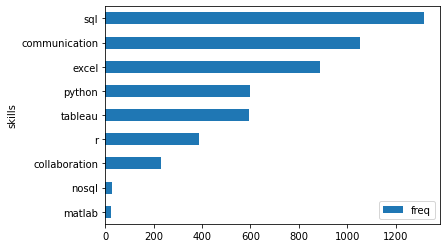

In [57]:
skills_df = skills_df.loc[skills_df['freq'] > 0]
skills_df.plot.barh(x='skills', y='freq')

<AxesSubplot:ylabel='skills'>

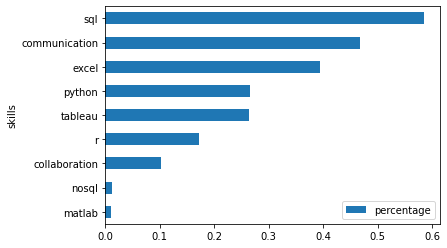

In [58]:
skills_df.plot.barh(x='skills', y='percentage')

### Required Programming Languages & Program Skills by Job Title (DataFrame)

In [59]:
df.columns

Index(['JobTitle', 'JobDescription', 'Rating', 'CompanyName', 'Location',
       'Industry', 'Sector', 'Revenue', 'EasyApply', 'LowerEndSalary',
       'UpperEndSalary', 'AvgSalary', 'python', 'sql', 'nosql', 'excel', 'r',
       'data visualization', 'machine learning', 'data cleaning', 'matlab',
       'tableau', 'data warehousing', 'critical thinking', 'communication',
       'problem solving', 'collaboration'],
      dtype='object')

In [60]:
columns_desired = ['JobTitle'] + list(skills_df['skills'].values)
columns_desired

['JobTitle',
 'matlab',
 'nosql',
 'collaboration',
 'r',
 'tableau',
 'python',
 'excel',
 'communication',
 'sql']

In [61]:
list(reversed(list(skills_df['skills'].values)))

['sql',
 'communication',
 'excel',
 'python',
 'tableau',
 'r',
 'collaboration',
 'nosql',
 'matlab']

In [62]:
grouped = df['JobTitle'].value_counts()
grouped

Data Analyst                                                      405
Senior Data Analyst                                               131
Junior Data Analyst                                                64
Business Data Analyst                                              28
Data Quality Analyst                                               17
                                                                 ... 
Functional Analyst (CECL Data)                                      1
Senior Business Intelligence Data Analyst                           1
Big Data Quality Analyst/Hadoop Testing analyst/ Hadoop Tester      1
Senior data analyst                                                 1
Data Science Sr. Analyst                                            1
Name: JobTitle, Length: 1266, dtype: Int64

In [63]:
columns_desired = ['JobTitle'] + list(reversed(list(skills_df['skills'].values)))
counts = df['JobTitle'].value_counts().to_frame()
grouped = df.groupby('JobTitle').sum().sort_values(
    by='sql', ascending=False)[list(reversed(list(
    skills_df['skills'].values)))]
together = counts.join(grouped).rename(columns={'JobTitle': '#_of_openings'}).head(15)
together

,#_of_openings,sql,communication,excel,python,tableau,r,collaboration,nosql,matlab
Data Analyst,405,295,177,160,118,106,79,45,8,3
Senior Data Analyst,131,110,63,50,66,63,42,9,2,4
Junior Data Analyst,64,51,15,52,7,9,4,4,1,0
Business Data Analyst,28,20,21,13,9,10,3,2,0,0
Data Quality Analyst,17,5,6,5,0,4,0,2,0,0
Data Governance Analyst,16,6,13,7,1,2,0,0,0,0
Lead Data Analyst,15,13,6,3,5,10,1,3,1,0
Data Reporting Analyst,13,9,4,7,3,4,1,1,0,0
Financial Data Analyst,12,8,4,9,2,2,1,0,0,0
Data Analyst I,11,1,5,8,0,2,0,1,0,0


In [64]:
"""
sns.barplot(x="proportion", y="jobtitle", hue="skills", 
            data=grouped,
           orient="h")"""

'\nsns.barplot(x="proportion", y="jobtitle", hue="skills", \n            data=grouped,\n           orient="h")'

### Most Desired Skill by JobTitle

### Correlation Between Skills Required and Salary

In [65]:
essential_skills = ["python", 'tableau', 'sql', 'excel', 'r']
df["#_of_skills"] = df[essential_skills].sum(axis=1)
df[["#_of_skills"]]


,#_of_skills
0,3
1,3
2,3
3,2
4,3
...,...
2248,0
2249,2
2250,1
2251,3


In [66]:
df.columns

Index(['JobTitle', 'JobDescription', 'Rating', 'CompanyName', 'Location',
       'Industry', 'Sector', 'Revenue', 'EasyApply', 'LowerEndSalary',
       'UpperEndSalary', 'AvgSalary', 'python', 'sql', 'nosql', 'excel', 'r',
       'data visualization', 'machine learning', 'data cleaning', 'matlab',
       'tableau', 'data warehousing', 'critical thinking', 'communication',
       'problem solving', 'collaboration', '#_of_skills'],
      dtype='object')

In [67]:
salary_cols = ['AvgSalary', 'LowerEndSalary', 'UpperEndSalary']
for col in salary_cols:
    df[col] = df[col].astype(int)
    print(df[col].dtype)

int32
int32
int32


In [68]:
group_skills = df.groupby('#_of_skills')
salary_and_skills = group_skills.mean()[['AvgSalary']]
#salary_and_skills.plot.boxplot()

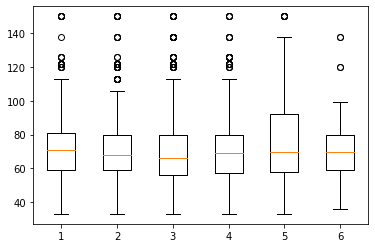

In [69]:
avgsalaries_per_skills = group_skills['AvgSalary'].apply(list)
salary_boxplot = plt.boxplot(avgsalaries_per_skills)

This wasn't very informative having grouped on the AverageSalary column, lets try with the UpperEndSalary column and see if we discover a stronger correlation between these two variables.

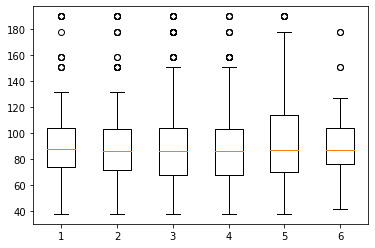

In [70]:
uppersalaries_per_skills = group_skills['UpperEndSalary'].apply(list)
salary_boxplot = plt.boxplot(uppersalaries_per_skills)

Still, surprisingly, salary does not seems to reflect the amount of technical skills listed in the job description

### Which Skill is Most Profitable to Learn?

<BarContainer object of 5 artists>

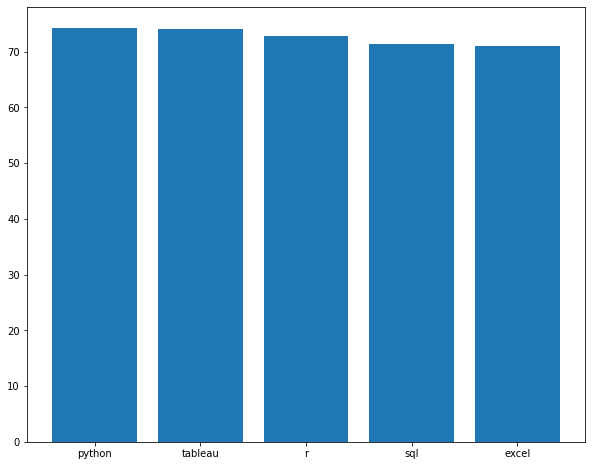

In [71]:
essential_skills = ["python", 'tableau', 'sql', 'excel', 'r']
skill_salary = [df[df[skill] == 1]['AvgSalary'].mean() for skill in essential_skills]
df_skill_salary = pd.DataFrame({'Skill': essential_skills, 
                                'Average Salary': skill_salary})
df_skill_salary.sort_values(by='Average Salary', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
plt.bar(df_skill_salary["Skill"], df_skill_salary['Average Salary'])


While the differences in salary are marginal, our salary data is not as accurate as we would like it to be, and more better data would likely reflect a similar trend but with greater salary disparities between the skills listed. It makes sense assuming that positions requiring python are also going to be more data science/machine learning oriented which are traditionally higher paying jobs than that of a traditional data analyst. Likewise, excel being at the bottom of the barrel aligns with our assumptions with data-entry-type positions offering less pay.

### Salary Differences by Company Name with Rating Scores (according to bins)

### What is the Best Paying Location?

In [72]:
df['Location'].value_counts()

New York, NY         310
Chicago, IL          130
San Francisco, CA    119
Austin, TX            81
Los Angeles, CA       80
                    ... 
Northlake, IL          1
Norristown, PA         1
Spring, TX             1
Signal Hill, CA        1
Cedar Park, TX         1
Name: Location, Length: 253, dtype: Int64

In [73]:
df["Location"].str.split(',').apply(len).value_counts()

2    2244
3       8
Name: Location, dtype: int64

There are 8 instances in which the location column has not separated between city and state as intended. Let's remedy this.

In [74]:
location_df = df["Location"].str.split(',').to_frame()
location_df['Length'] = location_df["Location"].apply(len)
location_df[location_df['Length'] == 3]

,Location,Length
2168,"[Greenwood Village, Arapahoe, CO]",3
2178,"[Greenwood Village, Arapahoe, CO]",3
2186,"[Greenwood Village, Arapahoe, CO]",3
2195,"[Greenwood Village, Arapahoe, CO]",3
2220,"[Greenwood Village, Arapahoe, CO]",3
2229,"[Greenwood Village, Arapahoe, CO]",3
2236,"[Greenwood Village, Arapahoe, CO]",3
2237,"[Greenwood Village, Arapahoe, CO]",3


In [75]:
#Handling exception outlined above
df.loc[df["Location"].str.contains("Greenwood Village"), 
       "Location"] = "Greenwood Village Arapahoe, CO"

In [76]:
location_df = df["Location"].str.split(',').to_frame()
location_df['Length'] = location_df["Location"].apply(len)
location_df

,Location,Length
0,"[New York, NY]",2
1,"[New York, NY]",2
2,"[New York, NY]",2
3,"[New York, NY]",2
4,"[New York, NY]",2
...,...,...
2248,"[Denver, CO]",2
2249,"[Centennial, CO]",2
2250,"[Denver, CO]",2
2251,"[Centennial, CO]",2


In [77]:
df["City"] = df["Location"].str.split(',').apply(lambda x: x[0])
df["State"] = df["Location"].str.split(',').apply(lambda x: x[1].strip()) 
df[["Location", "City", "State"]]

,Location,City,State
0,"New York, NY",New York,NY
1,"New York, NY",New York,NY
2,"New York, NY",New York,NY
3,"New York, NY",New York,NY
4,"New York, NY",New York,NY
...,...,...,...
2248,"Denver, CO",Denver,CO
2249,"Centennial, CO",Centennial,CO
2250,"Denver, CO",Denver,CO
2251,"Centennial, CO",Centennial,CO


### States With Best and Worst Paying Positions

<AxesSubplot:ylabel='State'>

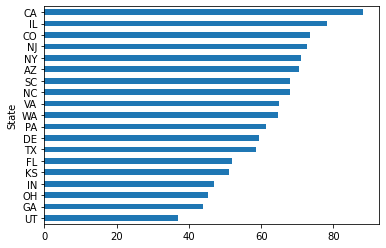

In [78]:
state_group = df.groupby('State')
state_salary = state_group['AvgSalary'].mean().sort_values(ascending=True)
best_paying = state_salary.tail(5)
worst_paying = state_salary.head(5)
state_salary.plot.barh()

<AxesSubplot:ylabel='State'>

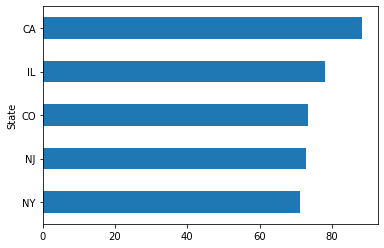

In [79]:
best_paying.plot.barh()

<AxesSubplot:ylabel='State'>

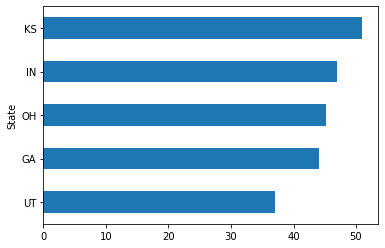

In [80]:
worst_paying.plot.barh()

Good thing I live in California!

### Cities (in California) With Best Paying Positions

<AxesSubplot:ylabel='City'>

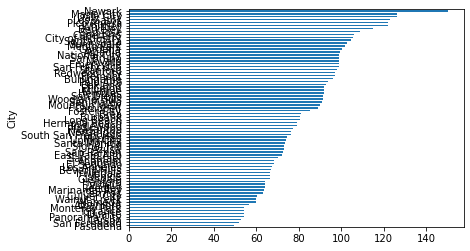

In [81]:
city_group = df[df["State"] == 'CA'].groupby('City')
city_salary = city_group['AvgSalary'].mean().sort_values(ascending=True)
city_salary.plot.barh()

## What are the Best Companies to Apply to Within California?

In [82]:
in_cali = df.loc[df["State"] == 'CA']
in_cali = in_cali.replace(',','', regex=True)
in_cali['CompanyName'].value_counts()

Staffigo Technical Services, LLC    12
Apple                               10
Diverse Lynx                         7
Lorven Technologies Inc              7
Molina Healthcare                    6
                                    ..
Hulu                                 1
Axelon Services Corporation          1
Tech Firefly                         1
Swinerton Builders                   1
Netpace, Inc                         1
Name: CompanyName, Length: 474, dtype: Int64

In [83]:
in_cali['JobDescription']

454     Ref ID: 00310-0011482030Classification: Sales ...
455     About the Employer


Nestled close to the maje...
456     The purpose of the Data Analyst in the Case In...
513     The Product Strategy Group works to ensure the...
514     About the Lead Data Analyst at Headspace:

Hea...
                              ...                        
2068    Scientific Business Analyst (PreClinical Data)...
2069    Our client is a global leader in software serv...
2070    Job Description
Below are the Job Details
Titl...
2071    At Franklin Templeton, we are dedicated to del...
2072    Job Description:

o Demonstrated Experience in...
Name: JobDescription, Length: 626, dtype: string

In [84]:
### Density of Jobs Across the World, US, and California (do in Tableau)

In [85]:
in_cali.to_csv(r'C:\Users\Jacob\Documents\Resume Projects\DataAnalystPositions\california_easy.csv', index=False)

In [86]:
in_cali.shape

(626, 30)

In [87]:
in_cali.isna().sum()

JobTitle                0
JobDescription          0
Rating                 79
CompanyName             0
Location                0
Industry              107
Sector                107
Revenue                44
EasyApply               0
LowerEndSalary          0
UpperEndSalary          0
AvgSalary               0
python                  0
sql                     0
nosql                   0
excel                   0
r                       0
data visualization      0
machine learning        0
data cleaning           0
matlab                  0
tableau                 0
data warehousing        0
critical thinking       0
communication           0
problem solving         0
collaboration           0
#_of_skills             0
City                    0
State                   0
dtype: int64

Let's see their rating distribution

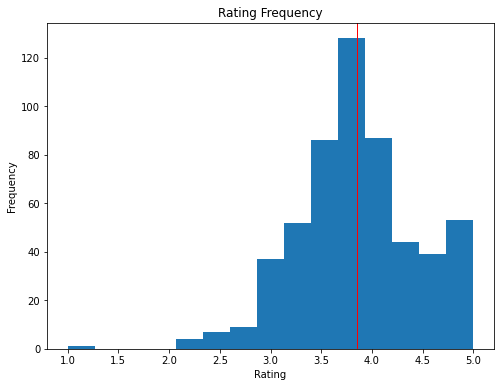

In [88]:
plt.figure(figsize=(8, 6))
rating_dist = plt.hist(in_cali['Rating'], bins=15)
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.axvline(in_cali['Rating'].mean(), color='r', linewidth=1)

I only want to consider companies with a rating of 3.5 or greater.

In [89]:
in_cali = in_cali.loc[in_cali["Rating"] >= 3.5]

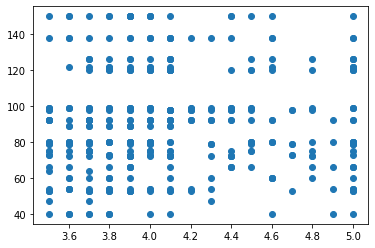

In [90]:
plt.scatter(in_cali["Rating"], in_cali["AvgSalary"])

In [91]:
list(avg.keys())

NameError: name 'avg' is not defined

In [ ]:
avg_df

In [ ]:
list(avg_df.keys())

In [ ]:
list(avg_df.values())[2]

In [ ]:
plt.xticks()
rating_bins = []
bin_avg_salaries = []
bin_upper_salaries = []
bin_lower_salaries = []

def rating_bin_function(salary="AvgSalary"):
    rating_bins = {}
    
    for i in np.arange(3.5, 5, 0.5):
        bin_min = i
        bin_max = i + 0.4

        if i == 4.5:
            bin_max = 5

        current_bin = str(bin_min) + '-' + str(bin_max)
        subset = in_cali.loc[(in_cali["Rating"] >= bin_min) &  
                             (in_cali["Rating"] <= bin_max)]
        bin_salaries = subset[salary]
        rating_bins[current_bin] = bin_salaries
        
    return rating_bins

    
avg_df = pd.DataFrame(rating_bin_function())
sns.boxplot(data=avg_df)

In [ ]:
lower_df = pd.DataFrame(rating_bin_function("LowerEndSalary"))
sns.boxplot(data=lower_df)

In [ ]:
upper_df = pd.DataFrame(rating_bin_function("UpperEndSalary"))
sns.boxplot(data=upper_df)